In [1]:
import pandas as pd 
import numpy as np 


import matplotlib.pyplot as plt 

import seaborn as sns  

%matplotlib inline

import scipy as sp 


In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
df=pd.read_csv("C:/Users/Admin/Downloads/dataset2.csv")
df.head()

,Date,PetrolPrice,Price Date,Sl no.,District Name_x,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,District Name_y
0,01/01/2018,69.38,01/01/2018,35074.0,Banaskanth,Deesa,Wheat,Other,FAQ,1650.0,...,13.0,0.0,32.0,0.0,1012.0,30.0,10.0,109.0,9.0,Ahmedabad
1,02/01/2018,69.38,02/01/2018,44979.0,Panchmahals,Derol(Adadara),Wheat,Lokwan,FAQ,1690.0,...,22.0,0.0,28.0,0.0,1013.0,29.0,10.0,59.0,14.0,Ahmedabad
2,03/01/2018,69.38,03/01/2018,4069.0,Amreli,Amreli,Wheat,Rajasthan Tukdi,FAQ,1565.0,...,21.0,0.0,27.0,0.0,1013.0,30.0,10.0,95.0,12.0,Ahmedabad
3,04/01/2018,69.38,04/01/2018,60910.0,Panchmahals,Gogamba,Wheat,Other,FAQ,1550.0,...,13.0,0.0,25.0,0.0,1014.0,31.0,10.0,193.0,9.0,Ahmedabad
4,05/01/2018,69.38,05/01/2018,24595.0,Surendranagar,Chotila,Wheat,Hybrid,FAQ,1400.0,...,11.0,0.0,30.0,0.0,1013.0,30.0,10.0,186.0,8.0,Ahmedabad


In [6]:
data=df.dropna()
data.head()
data.dtypes

Date                          object
PetrolPrice                  float64
Price Date                    object
Sl no.                       float64
District Name_x               object
Market Name                   object
Commodity                     object
Variety                       object
Grade                         object
Min Price (Rs./Quintal)      float64
Max Price (Rs./Quintal)      float64
Modal Price (Rs./Quintal)    float64
maxtempC                     float64
mintempC                     float64
totalSnow_cm                 float64
sunHour                      float64
uvIndex                      float64
moon_illumination            float64
moonrise                      object
moonset                       object
sunrise                       object
sunset                        object
DewPointC                    float64
FeelsLikeC                   float64
HeatIndexC                   float64
WindChillC                   float64
WindGustKmph                 float64
c

In [7]:
# dataset=pd.DataFrame(data,columns=['Modal Price (Rs./Quintal)','Date']) 
# dataset
from datetime import date


# df2 = pd.read_csv('C:/Users/NEHA/Desktop/Date_price.csv',index_col=[0],parse_dates=[0])
# df2.head(20)


mydateparser=lambda x: pd.datetime.strptime(x,"%d-%m-%Y")
df2=pd.read_csv("C:/Users/Admin/Downloads/Date_price.csv",sep=',',parse_dates=[0],date_parser=mydateparser,index_col=[0])
df2


,Modal Price (Rs./Quintal)
Date,
2018-01-01,1675.0
2018-01-02,1700.0
2018-01-03,1800.0
2018-01-04,1570.0
2018-01-05,1700.0
...,...
2021-12-20,2000.0
2021-12-21,2025.0
2021-12-22,2165.0


In [8]:
df2.isna().sum()
data1=df2.dropna()
data1.dtypes

Modal Price (Rs./Quintal)    float64
dtype: object

In [9]:
split_date ='01-Jan-2020'
data_train = data1.loc[data1.index <= split_date].copy()
data_test = data1.loc[data1.index > split_date].copy()

In [10]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','month','dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [11]:
X_train, y_train = create_features(data_train,label='Modal Price (Rs./Quintal)')
X_test, y_test = create_features(data_test,label='Modal Price (Rs./Quintal)')

In [12]:
#xgboost model
import xgboost as xgb
from xgboost import plot_importance, plot_tree
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=30,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [13]:
data_test['price_Prediction'] = reg.predict(X_test)
#predicted=reg.predict(X_test)
data_all = pd.concat([data_test,data_train], sort=False)
data_test['price_Prediction'].head(20)


Date
2020-01-02    1740.864502
2020-01-05    1722.522705
2020-01-06    1778.921509
2020-01-07    1778.921509
2020-01-08    1848.961670
2020-01-09    1830.623535
2020-01-10    1830.623535
2020-01-12    1665.217773
2020-01-13    1738.039795
2020-01-15    1794.312744
2020-01-16    1775.974609
2020-01-17    1775.974609
2020-01-18    1775.974609
2020-01-20    1794.312744
2020-01-21    1794.312744
2020-01-22    1767.984619
2020-01-23    1749.646484
2020-01-24    1749.646484
2020-01-25    1749.646484
2020-01-27    1767.984619
Name: price_Prediction, dtype: float32

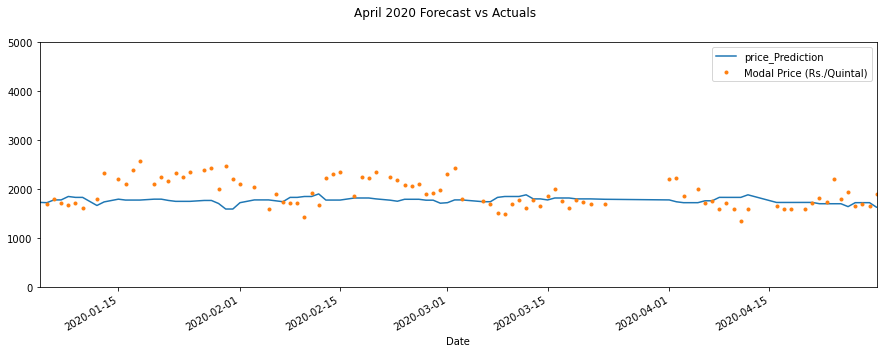

In [14]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['price_Prediction','Modal Price (Rs./Quintal)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-04-2020', upper='30-04-2020')
ax.set_ylim(0,5000)
plot = plt.suptitle('April 2020 Forecast vs Actuals')

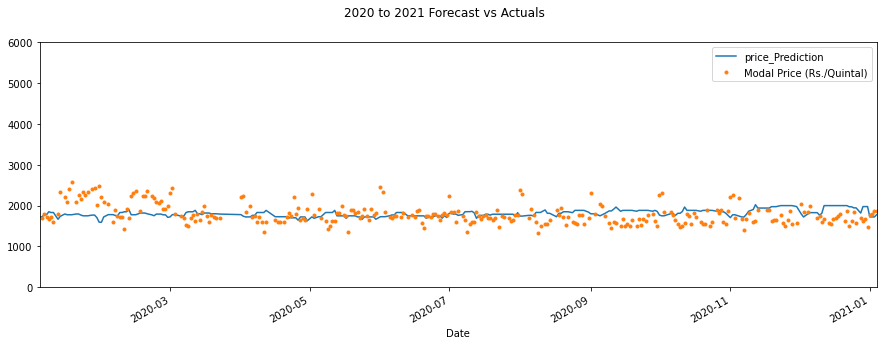

In [15]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['price_Prediction','Modal Price (Rs./Quintal)']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-04-2020', upper='01-04-2021')
ax.set_ylim(0, 6000)
plot = plt.suptitle('2020 to 2021 Forecast vs Actuals')

In [16]:
#worst predicted days
data_test['error'] = data_test['Modal Price (Rs./Quintal)'] - data_test['price_Prediction']
data_test['abs_error'] = data_test['error'].apply(np.abs)
error_by_day = data_test.groupby(['year','month','dayofmonth']) \
    .mean()[['Modal Price (Rs./Quintal)','price_Prediction','error','abs_error']]

In [17]:
error_by_day.sort_values('error', ascending=True).head(10)

Modal Price (Rs./Quintal)  price_Prediction  \
year month dayofmonth                                                
2021 5     8                              1300.0       1830.623535   
2020 7     9                              1345.0       1850.957397   
     8     9                              1330.0       1832.358154   
     12    31                             1475.0       1976.060181   
     11    25                             1500.0       1999.886597   
     12    23                             1490.0       1971.057739   
     4     11                             1350.0       1830.623535   
     12    15                             1545.0       1999.886597   
     11    28                             1550.0       1999.886597   
           24                             1575.0       1999.886597   

                            error   abs_error  
year month dayofmonth                          
2021 5     8          -530.623535  530.623535  
2020 7     9          -505.957397  505.957397  
     8     9          -502.358154  502.358154  
     12    31         -501.060181  501.060181  
     11    25         -499.886597  499.886597  
     12    23         -481.057739  481.057739  
     4     11         -480.623535  480.623535  
     12    15         -454.886597  454.886597  
     11    28         -449.886597  449.886597  
           24         -424.886597  424.886597

In [18]:
error_by_day.sort_values('abs_error', ascending=False).head(10)

Modal Price (Rs./Quintal)  price_Prediction  \
year month dayofmonth                                                
2020 1     30                             2475.0       1592.943848   
           18                             2575.0       1775.974609   
     6     1                              2450.0       1727.890381   
     1     28                             2440.0       1767.984619   
     3     2                              2440.0       1778.921509   
     8     1                              2380.0       1742.981689   
     1     27                             2400.0       1767.984619   
           17                             2400.0       1775.974609   
           31                             2212.0       1592.943848   
           13                             2337.0       1738.039795   

                            error   abs_error  
year month dayofmonth                          
2020 1     30          882.056152  882.056152  
           18          799.025391  799.025391  
     6     1           722.109619  722.109619  
     1     28          672.015381  672.015381  
     3     2           661.078491  661.078491  
     8     1           637.018311  637.018311  
     1     27          632.015381  632.015381  
           17          624.025391  624.025391  
           31          619.056152  619.056152  
           13          598.960205  598.960205

In [19]:
#Best predicted days
error_by_day.sort_values('abs_error', ascending=True).head(10)

Modal Price (Rs./Quintal)  price_Prediction     error  \
year month dayofmonth                                                          
2021 12    20                             2000.0       1999.886597  0.113403   
     1     15                             1775.0       1775.974609 -0.974609   
2020 6     26                             1750.0       1751.010254 -1.010254   
2021 6     17                             1750.0       1748.608765  1.391235   
2020 6     23                             1725.0       1722.749634  2.250366   
     2     7                              1745.0       1742.241577  2.758423   
2021 1     27                             1765.0       1767.984619 -2.984619   
     9     17                             1880.0       1883.105591 -3.105591   
     10    2                              1745.0       1749.401367 -4.401367   
     1     22                             1755.0       1749.646484  5.353516   

                       abs_error  
year month dayofmonth             
2021 12    20           0.113403  
     1     15           0.974609  
2020 6     26           1.010254  
2021 6     17           1.391235  
2020 6     23           2.250366  
     2     7            2.758423  
2021 1     27           2.984619  
     9     17           3.105591  
     10    2            4.401367  
     1     22           5.353516

In [23]:
#for grid search
dff=pd.DataFrame(data,columns=['Date','tempC','Modal Price (Rs./Quintal)','PetrolPrice'])
dff

,Date,tempC,Modal Price (Rs./Quintal),PetrolPrice
0,01/01/2018,30.0,1675.0,69.38
1,02/01/2018,29.0,1700.0,69.38
2,03/01/2018,30.0,1800.0,69.38
3,04/01/2018,31.0,1570.0,69.38
4,05/01/2018,30.0,1700.0,69.38
...,...,...,...,...
1449,20/12/2021,30.0,2000.0,95.11
1450,21/12/2021,31.0,2025.0,95.11
1451,22/12/2021,32.0,2165.0,95.11
1452,23/12/2021,32.0,2075.0,95.11


In [24]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dff['Date']=le.fit_transform(dff['Date'])

In [25]:
x=dff.drop('Modal Price (Rs./Quintal)',axis=1)
y=dff['Modal Price (Rs./Quintal)']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
#random forest regressor for grid search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
rf=RandomForestRegressor(random_state=42)
print(rf.get_params())



{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [28]:
#finding the best parameters
param_grid={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6]}
cfv=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
cfv.fit(x_train,y_train)

cfv.best_params_

{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}

In [29]:
pred=cfv.predict(x_test)
pred

array([2015.53183299, 1736.57446241, 1904.3497625 , 1814.60173022,
       1724.82275494, 1977.44668095, 1753.99507977, 1794.68072074,
       2147.57099439, 1945.95129663, 1911.77797117, 1873.91966936,
       2011.40350588, 1970.45180525, 1835.31939057, 1820.34768648,
       1856.40130497, 1830.25702269, 1676.16399584, 1750.23749842,
       1752.19122516, 1869.44407862, 1830.79476446, 1809.81207477,
       1763.56379416, 1874.55863919, 1946.50574252, 1696.06902505,
       1836.35449634, 1959.90961244, 1941.91422712, 1827.52211279,
       1651.77521261, 2086.35748267, 1842.60295072, 1848.42609171,
       1676.00320509, 2076.94755954, 1883.25761384, 1853.79292666,
       1751.65058001, 1818.67803286, 1747.31435745, 1914.24516472,
       2018.69804103, 1822.39466729, 2023.70298381, 1738.16875215,
       1881.74024385, 2100.65289061, 1739.56563344, 1699.26197038,
       1838.81651171, 1804.6383066 , 1894.24635762, 1797.81618146,
       1881.96954063, 2132.89802056, 1805.91698123, 1673.10043

In [30]:
import base64
import pandas as pd
from IPython.display import HTML
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
create_download_link(error_by_day)